# 다항 회귀의 이해
- 2차, 3차 방정식과 같은 다항식으로 표현되는 회귀
- 비선형 회귀로 착각하기 쉽지만, 선형 회귀!
- 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관
- w*X 꼴로 표현되면, 선형
- Polynomial regression 클라스는 지원x

## 2차

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [3]:
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [5]:
poly = PolynomialFeatures(degree = 2)
#[1,x1,x2,x1*x1,x1*x2,x2*x2]
poly_ftr = poly.fit_transform(X)
poly_ftr

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

## 3차

In [11]:
def polynomial_func(X) :
    y = 1+2*X+X**2+X**3
    return y

X = np.arange(4).reshape(2,2)
y = polynomial_func(X) #true y

print('X \n', X,'\n', 'y \n', y)

X 
 [[0 1]
 [2 3]] 
 y 
 [[ 1  5]
 [17 43]]


In [12]:
#3차 다항함수 feature -> 10개
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
poly_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(poly_ftr, y)

print('3차 polynomial regression coefficient \n', np.round(lr.coef_,2))

3차 polynomial regression coefficient 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


### pipeline 이용

In [17]:
from sklearn.pipeline import Pipeline

array([ 6, 60])

In [22]:
model = Pipeline([('poly', PolynomialFeatures(degree = 3)), ('linear', LinearRegression())])
model.fit(X,y)

print('Polynomial coefficient \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial coefficient 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


# overfitting & underfitting
- 차수가 높아질수록 과적합(overfitting)

In [24]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def true_fun(X) :
    return np.cos(1.5*np.pi*X)

In [28]:
np.random.seed(0)
n_samples = 30

#X : 0부터 1까지 임의의 수를 크기 순서대로
X = np.sort(np.random.rand(n_samples))

#y : true function에 약간의 노이즈를 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


 Degree 1 회귀 계수 : [-1.609] 
 RMSE : 0.6385365788346572

 Degree 4 회귀 계수 : [  0.468 -17.79   23.593  -7.263] 
 RMSE : 0.20786714476395127

 Degree 15 회귀 계수 : [-2.98294700e+03  1.03899932e+05 -1.87417069e+06  2.03717225e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 
 RMSE : 13520.925762553677


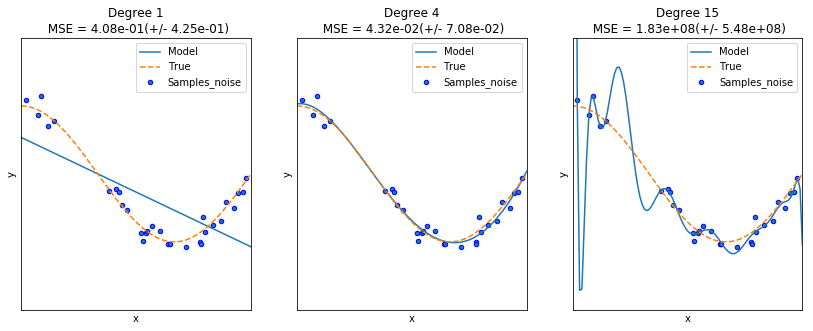

In [36]:
plt.figure(figsize = (14,5))
degrees = [1,4,15]

for i in range(len(degrees)) :
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks = (), yticks = ()) #xtick, ytick을 없앰
    
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias=False)
    lr = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ('linear_regression', lr)])
    pipeline.fit(X.reshape(-1,1),y)
    
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = 'neg_mean_squared_error', cv = 10)
    coef = pipeline.named_steps['linear_regression'].coef_
    
    print('\n Degree {0} 회귀 계수 : {1} \n RMSE : {2}'.format(degrees[i], np.round(coef,3), np.sqrt(-np.mean(scores))))
    
    #test X는 0부터 1까지 100개로 나누어 예측
    X_test = np.linspace(0,1,100)
    
    #predict plot
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model') #np.newaxis를 사용하면 1D -> 2D (-1,1)과 같음
    #true plot
    plt.plot(X_test, true_fun(X_test),'--', label = 'True')
    plt.scatter(X,y, edgecolor = 'b', s = 20, label = 'Samples_noise')
    
    plt.xlabel('x'); plt.ylabel('y')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend(loc = 'best')
    
    plt.title('Degree {}\n MSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

- Degree 1 : underfitting
- Dgree 4 : best
- Degree 15 : 데이터의 변동까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트에서만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐. overfitting

![title](/notebooks/biasvariance2.png "bv1")

![title](/notebooks/biasvariance.png "bv2")

- variance-bias 는 한쪽이 작이지면, 한쪽이 커지는 구조(trade-off)
- bias가 높으면, 분산이 낮아짐(underfitting)
- bias가 낮으면, 분산이 커짐(overfitting)

$$Y = f(X) + \epsilon, \epsilon ~ N(0, \sigma_\epsilon) $$
$$Err(x) = E[(Y - \hat{f}(x))^2] = (E[\hat{f}(x)] - f(x))^2 + E[(\hat{f}(x)-E[\hat{f}(x)])^2] + \sigma_\epsilon^2$$
$$Err(x) = Bias^2 + Variance +Irreducible Error$$